### 14장 모델 성능 향상 
* wine 예제

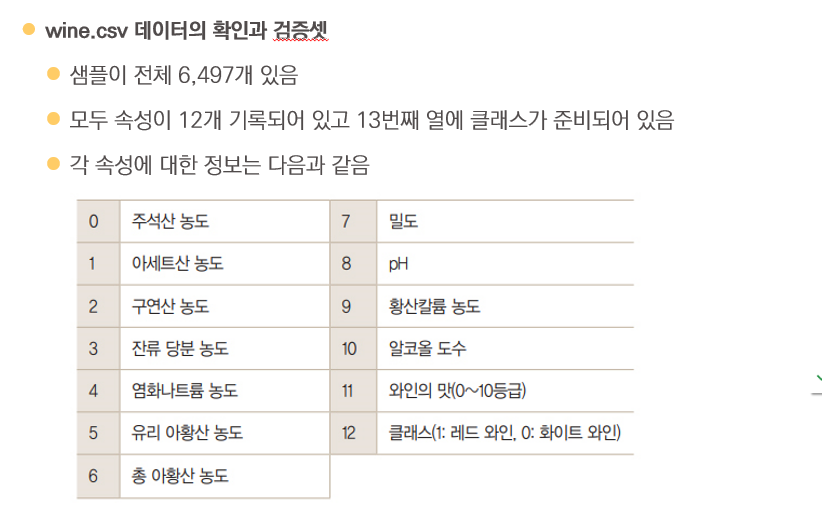

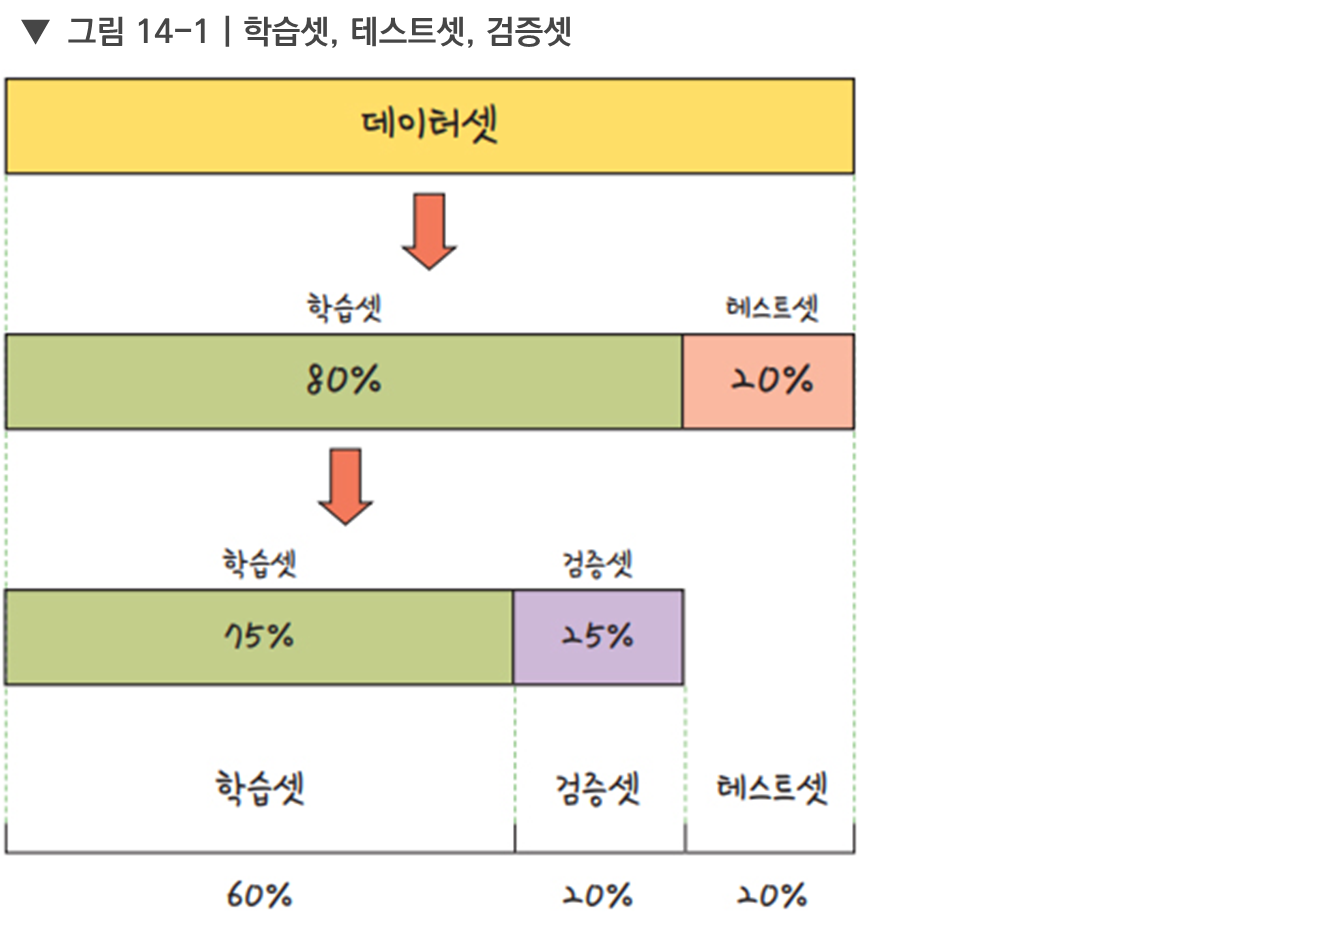

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('../data/wine.csv', header=None)

# 데이터를 미리 보겠습니다.
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [2]:
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.shape, y.shape

((6497, 12), (6497,))

In [3]:
# #학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5197, 12), (1300, 12), (5197,), (1300,))

In [4]:
# 모델의 구조 설정
model = Sequential()
model.add(Dense(24, input_dim=12, activation='relu'))  # 입력 정의
model.add(Dense(30, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 출력 정의
model.summary() 

d:\Users\admin\anaconda3\envs\py310\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 24)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,319 (5.15 KB)

 Trainable params: 1,319 (5.15 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# 모델 컴파일 (loss, optimizer, metrics)  <- 2진 분류...
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행 : 검증 데이터 비율 지정 0.2
history = model.fit(X_train, y_train, epochs=50, batch_size=200, validation_split=0.2)

Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9524 - loss: 0.1497 - val_accuracy: 0.9394 - val_loss: 0.1614
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9565 - loss: 0.1258 - val_accuracy: 0.9529 - val_loss: 0.1313
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9603 - loss: 0.1178 - val_accuracy: 0.9500 - val_loss: 0.1326
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9591 - loss: 0.1215 - val_accuracy: 0.9442 - val_loss: 0.1476
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9613 - loss: 0.1158 - val_accuracy: 0.9519 - val_loss: 0.1253
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9603 - loss: 0.1127 - val_accuracy: 0.9538 - val_loss: 0.1220
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9622 - loss: 0.1168 - val_accuracy: 0.9529 - val_loss: 0.1216
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9632 - loss: 0.1090 - val_accuracy: 0.9577 - v

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9785 - loss: 0.0570
Validation loss= 0.05699160695075989
Validation accuracy= 0.9784615635871887


<Axes: >

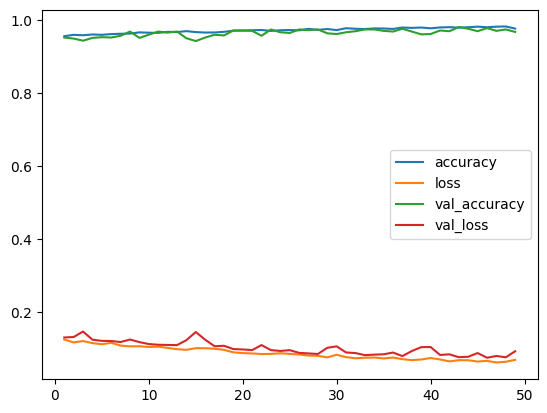

In [8]:
# 테스트 결과 출력 (Test Data Set으로 evaluate)
score = model.evaluate(X_test, y_test)
print('Validation loss=', score[0])
print('Validation accuracy=', score[1])

df_result = pd.DataFrame(history.history)
df_result[1:].plot()

## 모델 업데이트

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('../data/wine.csv', header=None)
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# #학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델의 구조 설정
model = Sequential()
model.add(Dense(24, input_dim=12, activation='relu'))  # 입력 정의
model.add(Dense(30, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 출력 정의
model.summary() 

# 모델 컴파일 (loss, optimizer, metrics)  <- 2진 분류...
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

d:\Users\admin\anaconda3\envs\py310\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 24)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 30)             │           750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,319 (5.15 KB)

 Trainable params: 1,319 (5.15 KB)

 Non-trainable params: 0 (0.00 B)

### 모델의 저장 및 실행

In [14]:
## 모델의 저장 조건 설정 (탐색기로 관찰할 것-폴더내 파일 지우고)
## 매 에포크마다 아래의 파일 이름으로 모델이 저장됨
# model_path = '../data/model/wine/{epoch:03d}-{val_accuracy:.4f}.keras'
checkpointer = ModelCheckpoint(filepath="../data/model/wine_model.keras", verbose=1)
# checkpointer = ModelCheckpoint(filepath=model_path, verbose=1, save_best_only=True)

In [15]:
# 모델 실행
history = model.fit(X_train, y_train, epochs=200, batch_size=200, 
                    validation_split=0.25,
                    callbacks=[checkpointer])

Epoch 1/200
 1/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.6850 - loss: 0.6007
Epoch 1: saving model to ../data/model/wine_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8075 - loss: 0.3824 - val_accuracy: 0.8831 - val_loss: 0.2938
Epoch 2/200
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8989 - loss: 0.2741 
Epoch 2: saving model to ../data/model/wine_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9076 - loss: 0.2711 - val_accuracy: 0.9231 - val_loss: 0.2394
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9240 - loss: 0.2300 
Epoch 3: saving model to ../data/model/wine_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9197 - loss: 0.2411 - val_accuracy: 0.9115 - val_loss: 0.2392
Epoch 4/200
17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9263 - loss: 0.2197 
Epoch 4: saving model to ../data/model/wine_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9222 - loss: 0.2235 - val_accur

In [16]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [17]:
df_history = pd.DataFrame(history.history)
df_history

,accuracy,loss,val_accuracy,val_loss
0,0.807544,0.382385,0.883077,0.293841
1,0.907621,0.271094,0.923077,0.239423
2,0.919682,0.241067,0.911538,0.239217
3,0.922248,0.223518,0.928462,0.203177
4,0.926867,0.211624,0.928462,0.199100
...,...,...,...,...
195,0.986400,0.047743,0.985385,0.038064
196,0.986143,0.048182,0.982308,0.046100
197,0.982551,0.059702,0.983077,0.040188
198,0.981011,0.063026,0.980769,0.050983


<Axes: >

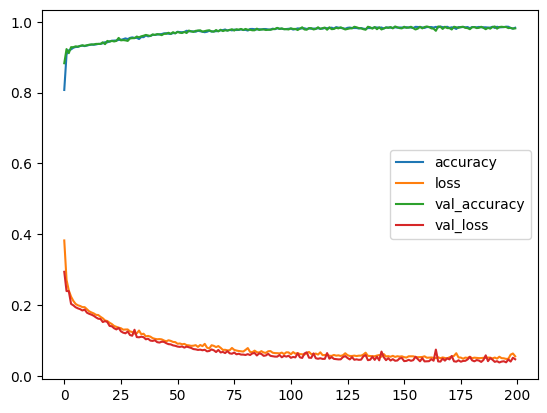

In [18]:
df_history.plot()

<Axes: >

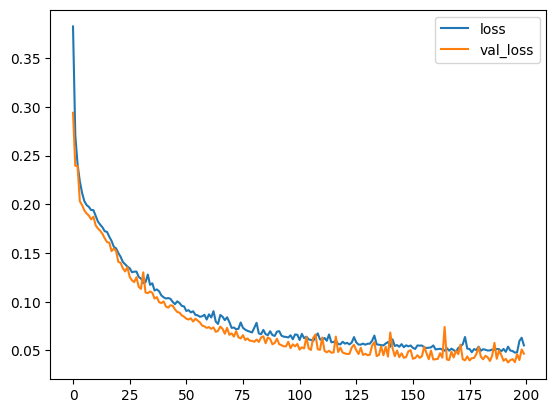

In [19]:
# loss 시각화
import matplotlib.pyplot as plt
df_history[['loss', 'val_loss']].plot()

<Axes: >

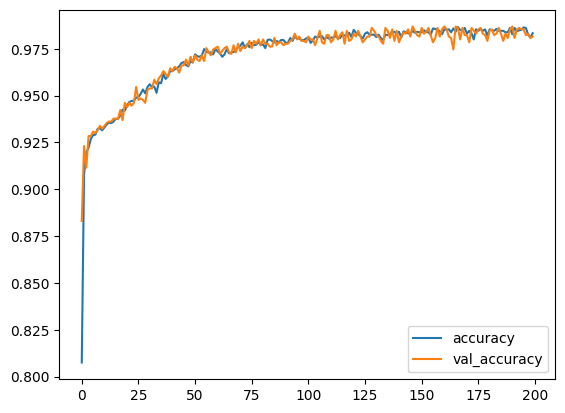

In [20]:
## accuracy 시각화
df_history[['accuracy', 'val_accuracy']].plot()

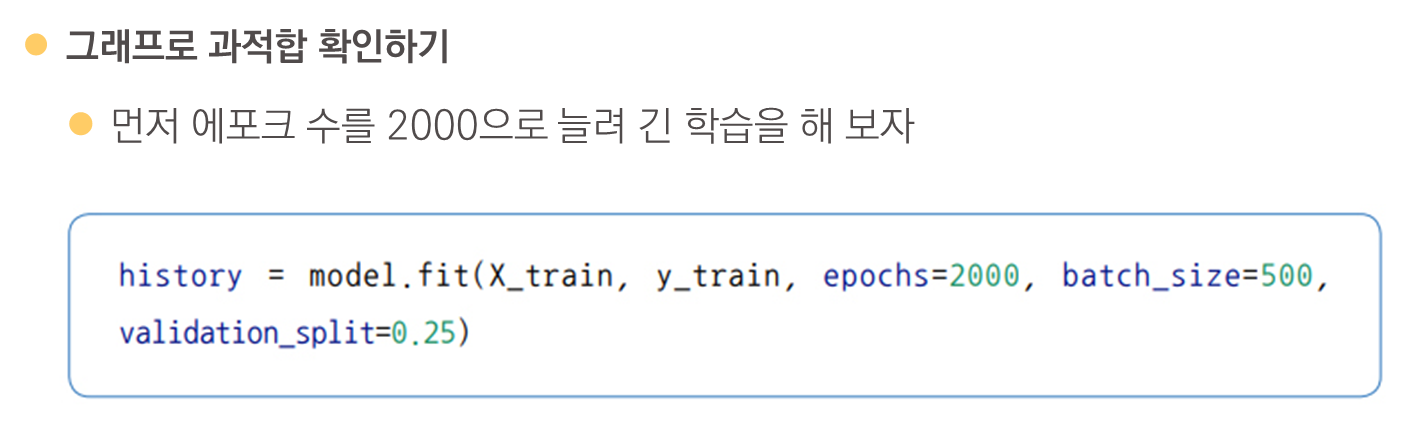

In [21]:
## save_best_only=True로 개선된 모델만 저장
## epochs 2000 -> 시간 오래 걸림 (3분 4초)
## 308번째 epoch에서 val_loss가 최저였음
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('../data/wine.csv', header=None)
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# #학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델의 구조 설정
model = Sequential()
model.add(Dense(24, input_dim=12, activation='relu'))  # 입력 정의
model.add(Dense(30, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 출력 정의
# model.summary() 

# 모델 컴파일 (loss, optimizer, metrics)  <- 2진 분류...
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


## 모델의 저장 조건 설정
model_path = '../data/model/wine_model.keras'
checkpointer = ModelCheckpoint(filepath=model_path, verbose=1,
                              save_best_only=True) # 개선된 모델만

# 모델 실행
history = model.fit(X_train, y_train, epochs=2000, batch_size=200, 
                    validation_split=0.25, verbose=0,
                   callbacks=[checkpointer])

d:\Users\admin\anaconda3\envs\py310\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from None to 0.26880, saving model to ../data/model/wine_model.keras

Epoch 2: val_loss improved from 0.26880 to 0.23219, saving model to ../data/model/wine_model.keras

Epoch 3: val_loss improved from 0.23219 to 0.21421, saving model to ../data/model/wine_model.keras

Epoch 4: val_loss improved from 0.21421 to 0.19486, saving model to ../data/model/wine_model.keras

Epoch 5: val_loss improved from 0.19486 to 0.18757, saving model to ../data/model/wine_model.keras

Epoch 6: val_loss improved from 0.18757 to 0.18011, saving model to ../data/model/wine_model.keras

Epoch 7: val_loss improved from 0.18011 to 0.17110, saving model to ../data/model/wine_model.keras

Epoch 8: val_loss did not improve from 0.17110

Epoch 9: val_loss improved from 0.17110 to 0.15953, saving model to ../data/model/wine_model.keras

Epoch 10: val_loss improved from 0.15953 to 0.15614, saving model to ../data/model/wine_model.keras

Epoch 11: val_loss improved from 0.15614 to 0.15030, 

In [22]:
## 시각화
df_history = pd.DataFrame(history.history)
df_history

,accuracy,loss,val_accuracy,val_loss
0,0.861432,0.350192,0.901538,0.268799
1,0.919682,0.241428,0.921538,0.232192
2,0.926097,0.217687,0.927692,0.214209
3,0.929433,0.203467,0.933846,0.194860
4,0.931229,0.192359,0.936923,0.187570
...,...,...,...,...
1995,0.995894,0.016295,0.987692,0.060915
1996,0.995894,0.016140,0.987692,0.063600
1997,0.995638,0.014936,0.986923,0.064131
1998,0.995124,0.016194,0.987692,0.062216


<Axes: >

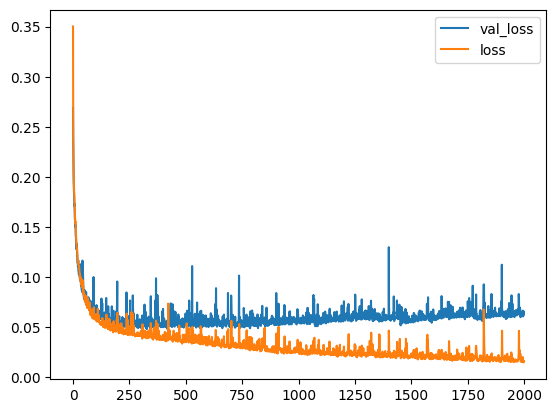

In [23]:
df_history[['val_loss', 'loss']].plot()

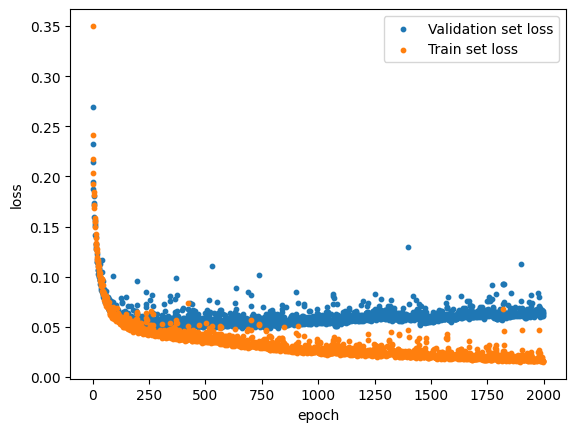

In [24]:
import numpy as np
x_len = np.arange(len(df_history))
plt.scatter(x_len, df_history['val_loss'], s=10, label='Validation set loss')
plt.scatter(x_len, df_history['loss'], s=10, label='Train set loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

###  학습 자동 중단 (EarlyStopping)

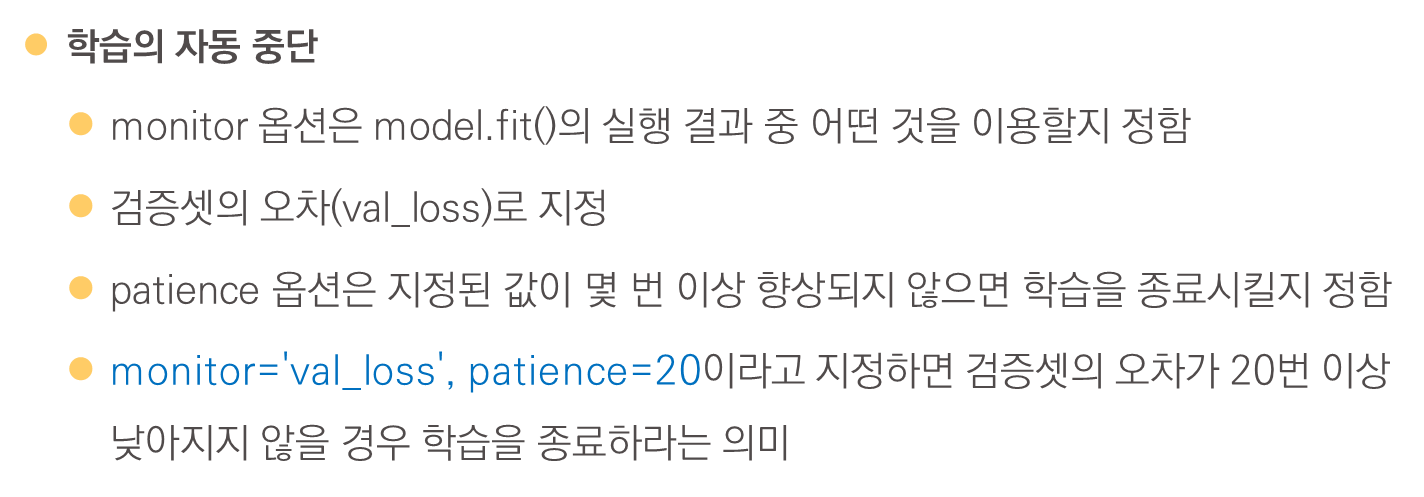

In [25]:
#############################################################
# 파일 자동 저장 : ModelCheckpoint()
# 자동 중단 : EarlyStopping()
#############################################################
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('../data/wine.csv', header=None)
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# #학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델의 구조 설정
model = Sequential()
model.add(Dense(24, input_dim=12, activation='relu'))  # 입력 정의
model.add(Dense(30, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 출력 정의
# model.summary() 

# 모델 컴파일 (loss, optimizer, metrics)  <- 2진 분류...
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습 자동 중단 callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

## 모델의 저장 조건 설정
# model_path = 'C:/data/model/wine/{epoch:02d}-{val_accuracy:.4f}.hdf5'
## epoch나 정확도 정보를 포함하지 않고, save_best_only=True로 설정하면 최고의 모델 하나만 저장함
model_path = '../data/model/wine_best_model.keras'    # 파일명이 변하지 않도록 -> 최종적으로 bestmodel만 저장
checkpointer = ModelCheckpoint(filepath=model_path, verbose=1,
                               save_best_only=True)

# 모델 실행
history = model.fit(X_train, y_train, epochs=2000, batch_size=200, 
                    validation_split=0.25, verbose=0,
                    callbacks=[checkpointer, early_stopping_callback])

d:\Users\admin\anaconda3\envs\py310\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_loss improved from None to 0.33730, saving model to ../data/model/wine_best_model.keras

Epoch 2: val_loss improved from 0.33730 to 0.31806, saving model to ../data/model/wine_best_model.keras

Epoch 3: val_loss improved from 0.31806 to 0.30812, saving model to ../data/model/wine_best_model.keras

Epoch 4: val_loss improved from 0.30812 to 0.29020, saving model to ../data/model/wine_best_model.keras

Epoch 5: val_loss improved from 0.29020 to 0.24471, saving model to ../data/model/wine_best_model.keras

Epoch 6: val_loss improved from 0.24471 to 0.18617, saving model to ../data/model/wine_best_model.keras

Epoch 7: val_loss improved from 0.18617 to 0.17882, saving model to ../data/model/wine_best_model.keras

Epoch 8: val_loss improved from 0.17882 to 0.17583, saving model to ../data/model/wine_best_model.keras

Epoch 9: val_loss improved from 0.17583 to 0.17277, saving model to ../data/model/wine_best_model.keras

Epoch 10: val_loss improved from 0.17277 to 0.17053, savi

<Axes: >

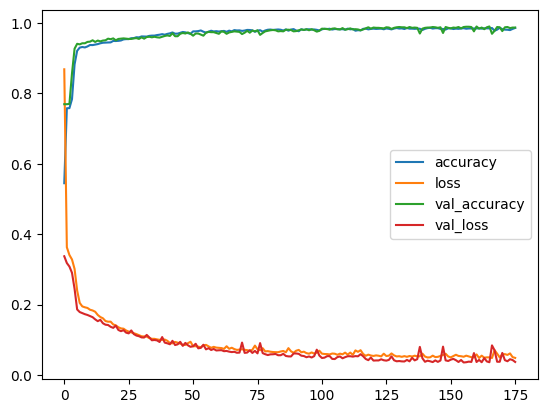

In [26]:
pd.DataFrame(history.history).plot()

In [27]:
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9823 - loss: 0.0644
Test accuracy: 0.9823076725006104
